In [ ]:
from google.colab import files
upload = files.upload()

Saving Housing.csv to Housing.csv


Aim of project:

This project is based on housing data from kaggle.

The aim of this project is to analyze a dataset containing information about houses and gain insights through data visualization. By exploring the dataset and creating various visualizations, we aim to understand the relationships between different variables, distributions of features, and proportions of categories within the dataset.

Through these visual representations, we can extract meaningful information and patterns that can aid in making data-driven decisions or further analysis. The project will utilize techniques such as count plots, scatter plot matrices, pie charts, and box plots to effectively visualize and interpret the data. Ultimately, the project aims to demonstrate the power of data visualization in extracting valuable insights from housing data.

In [ ]:
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.duplicated().sum()

0

Exploratory Data Analysis

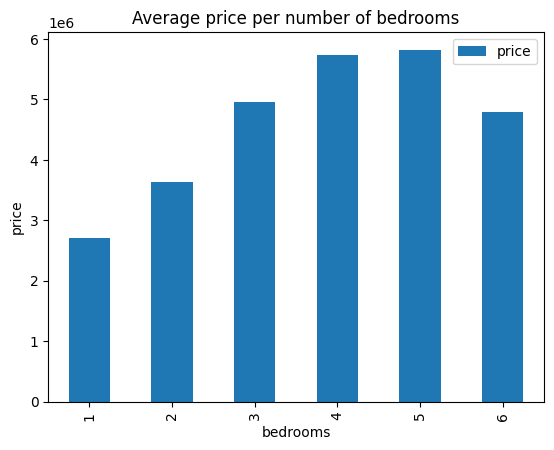

In [ ]:
import matplotlib.pyplot as plt
df_beds = df.groupby('bedrooms')['price'].mean().reset_index()
df_beds.plot(x = 'bedrooms', y = 'price', kind = 'bar')
plt.title('Average price per number of bedrooms')
plt.ylabel('price')
plt.show()

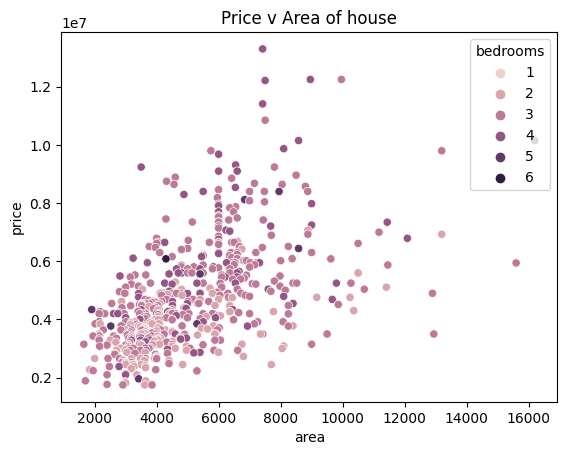

In [ ]:
import seaborn as sns
sns.scatterplot(data = df, x = 'area', y = 'price', hue = 'bedrooms')
plt.title('Price v Area of house')
plt.show()

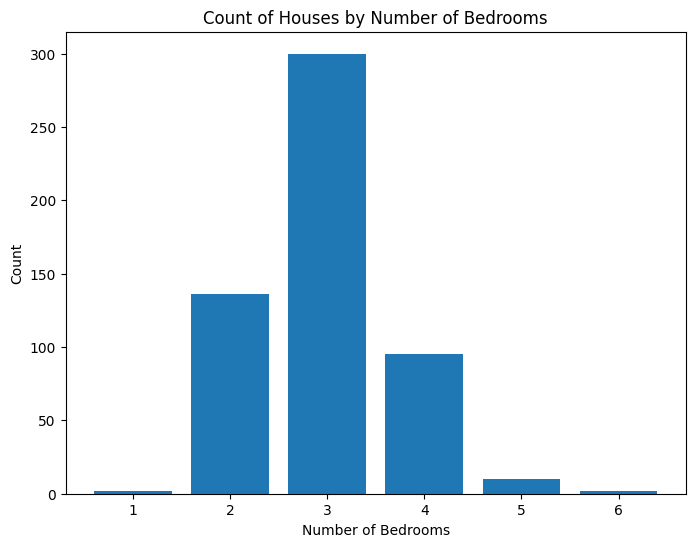

In [ ]:

# Count the number of houses in each bedroom category
bedroom_counts = df['bedrooms'].value_counts()

# bar plot
plt.figure(figsize=(8, 6))
plt.bar(bedroom_counts.index, bedroom_counts.values)

# labels and title
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.title("Count of Houses by Number of Bedrooms")

plt.show()

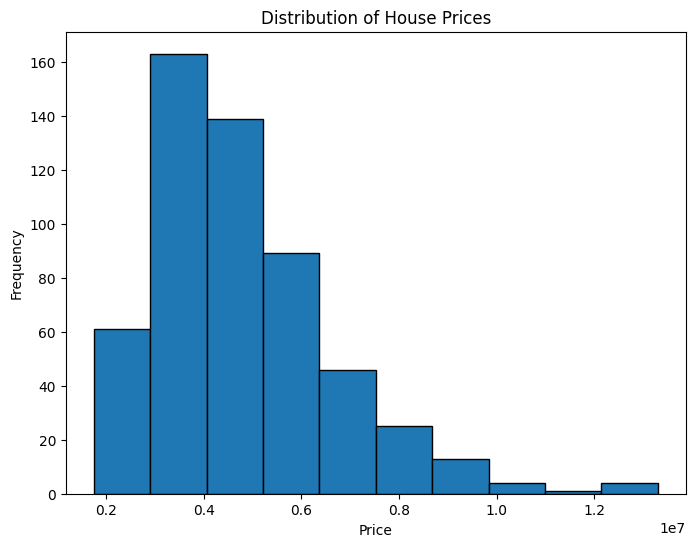

In [ ]:

# histogram of house prices
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=10, edgecolor='black')

# labels and title
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")

plt.show()

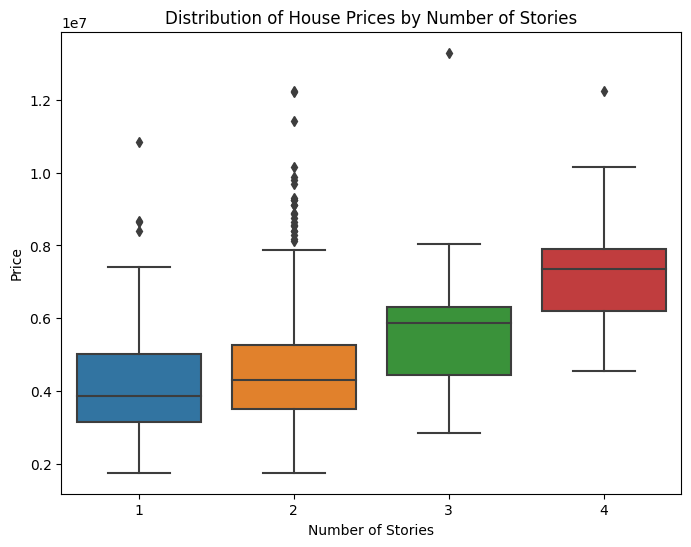

In [ ]:

# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='stories', y='price', data=df)

# labels and title
plt.xlabel("Number of Stories")
plt.ylabel("Price")
plt.title("Distribution of House Prices by Number of Stories")

plt.show()

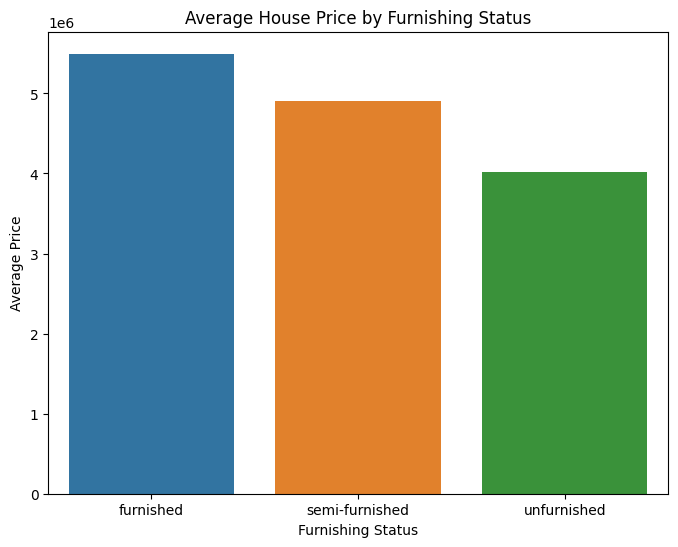

In [ ]:

# average price by furnishing status
avg_price_by_status = df.groupby('furnishingstatus')['price'].mean().reset_index()

# bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='furnishingstatus', y='price', data=avg_price_by_status)

# labels and title
plt.xlabel("Furnishing Status")
plt.ylabel("Average Price")
plt.title("Average House Price by Furnishing Status")

plt.show()

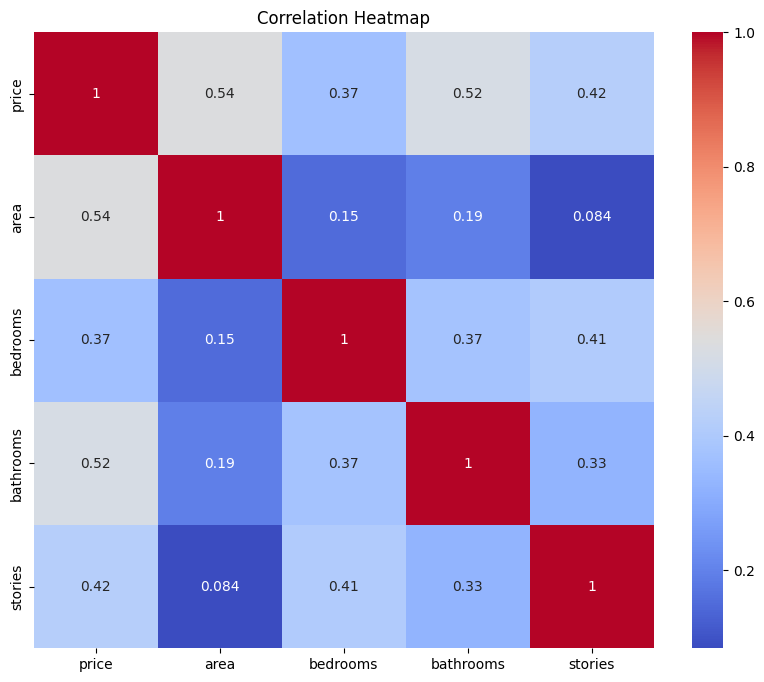

In [ ]:

# numerical columns for correlation analysis
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']

# correlation matrix
correlation_matrix = df[numerical_columns].corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# title
plt.title("Correlation Heatmap")

plt.show()

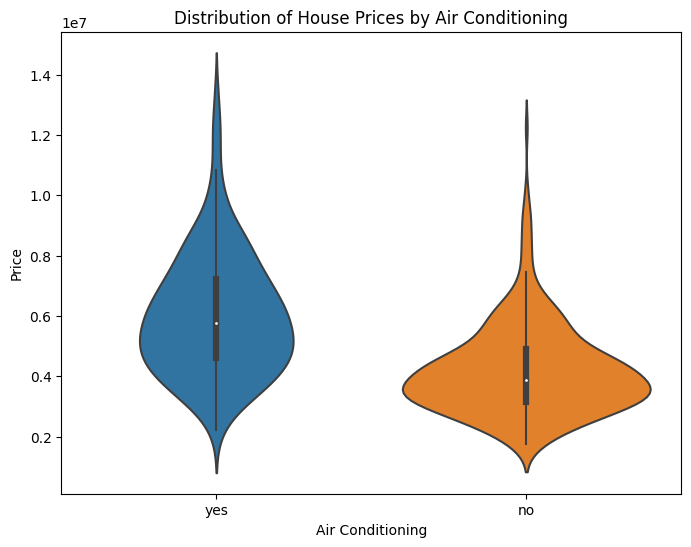

In [ ]:

# violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='airconditioning', y='price', data=df)

# labels and title
plt.xlabel("Air Conditioning")
plt.ylabel("Price")
plt.title("Distribution of House Prices by Air Conditioning")

plt.show()

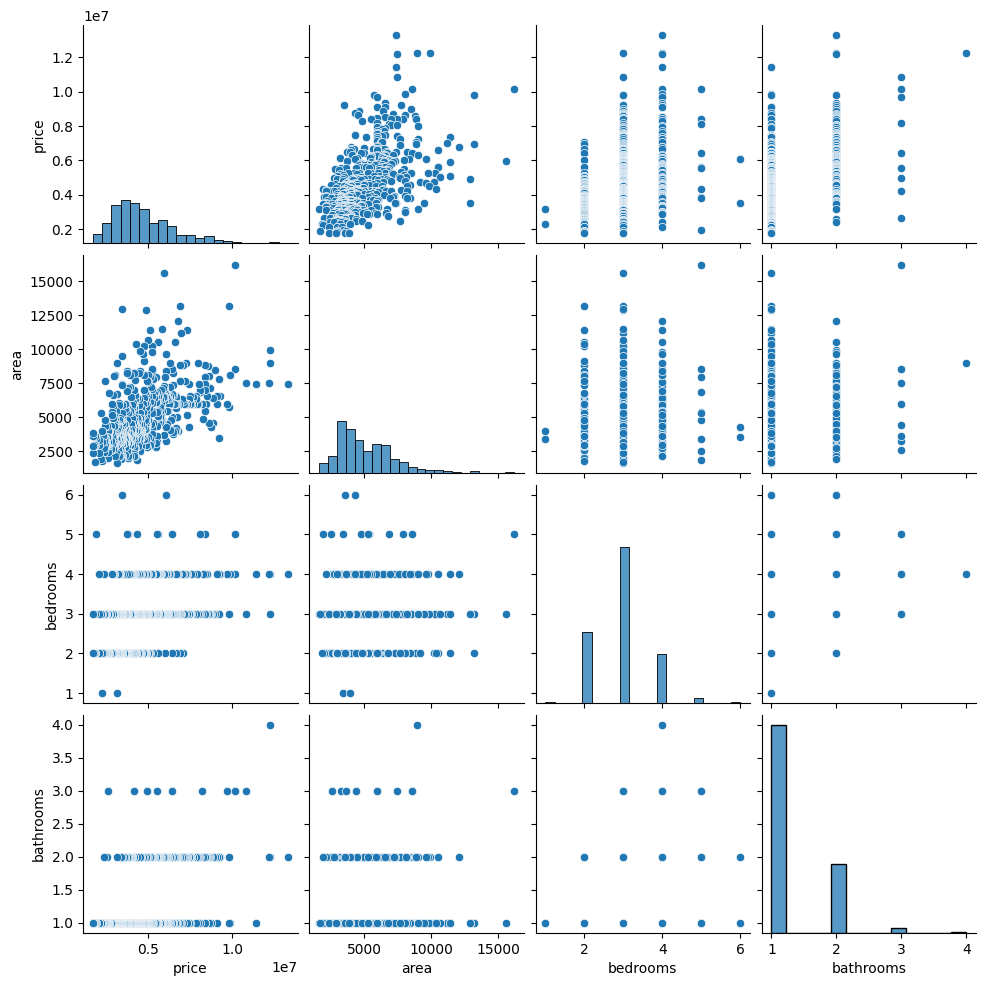

In [ ]:

# numerical columns for the pair plot
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms']

# pair plot
sns.pairplot(df[numerical_columns])

plt.show()

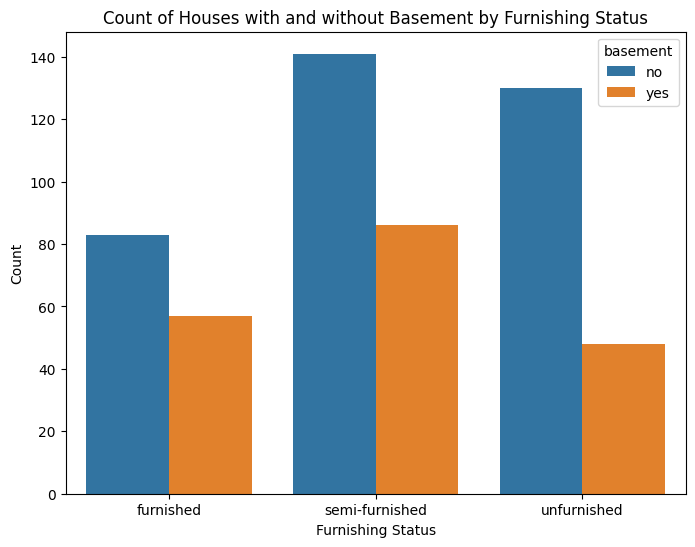

In [ ]:

# stacked bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='furnishingstatus', hue='basement', data=df)

# labels and title
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.title("Count of Houses with and without Basement by Furnishing Status")

plt.show()

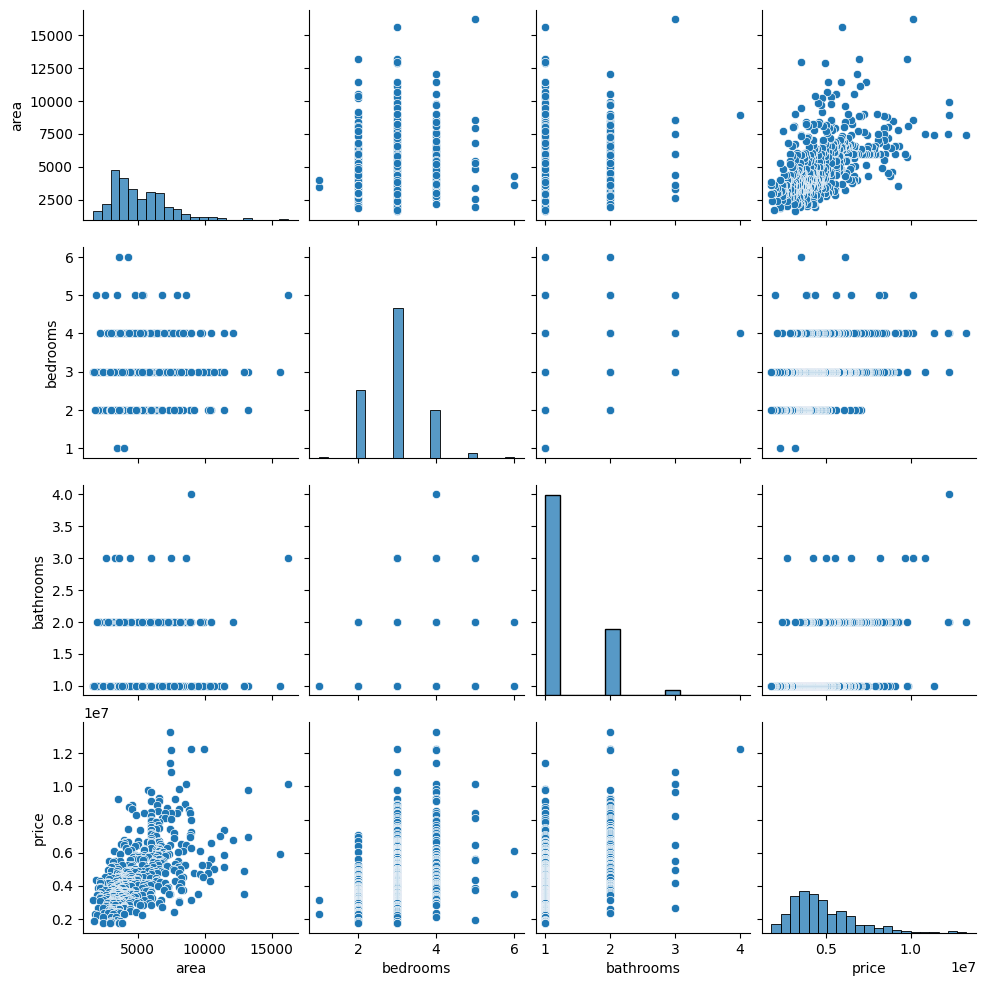

In [ ]:

# numerical columns for the scatter plot matrix
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'price']

# scatter plot matrix
sns.pairplot(df[numerical_columns])

plt.show()

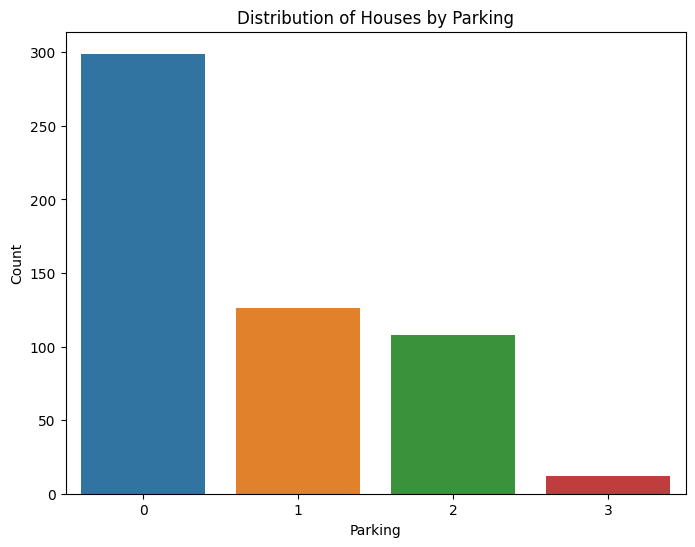

In [ ]:

# count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='parking', data=df)

# labels and title
plt.xlabel("Parking")
plt.ylabel("Count")
plt.title("Distribution of Houses by Parking")

plt.show()

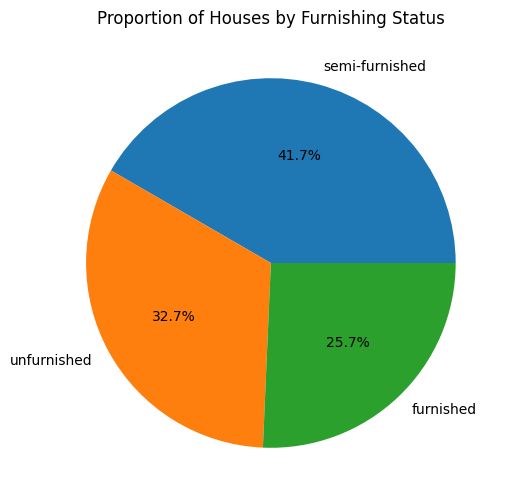

In [ ]:

# Ccount of houses in each furnishing status category
furnishing_counts = df['furnishingstatus'].value_counts()

# pie chart
plt.figure(figsize=(8, 6))
plt.pie(furnishing_counts, labels=furnishing_counts.index, autopct='%1.1f%%')

# title
plt.title("Proportion of Houses by Furnishing Status")

plt.show()

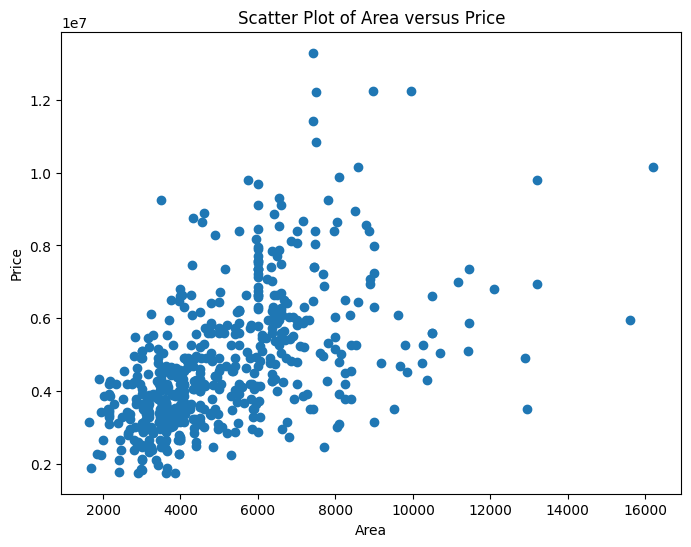

In [ ]:

# scatter plot of area versus price
plt.figure(figsize=(8, 6))
plt.scatter(df['area'], df['price'])

# labels and title
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Scatter Plot of Area versus Price")

plt.show()

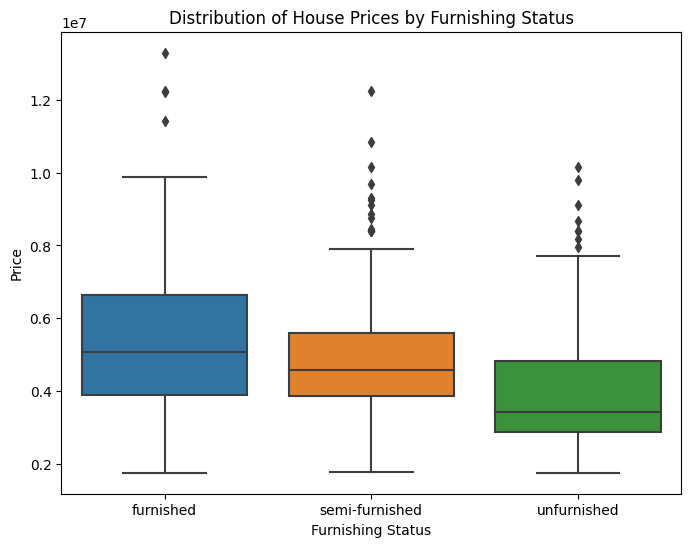

In [ ]:

# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='furnishingstatus', y='price', data=df)

# labels and title
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.title("Distribution of House Prices by Furnishing Status")

plt.show()

In this project, we analyzed a dataset containing information about houses from the "Housing.csv" file. We explored various visualizations to gain insights into the data.

Through these visualizations, we gained valuable insights into the data. We observed relationships between variables, distributions of certain features, and the proportion of houses in different categories. These findings can be useful for understanding the dataset and making informed decisions or further analysis.

Overall, this project demonstrated the power of data visualization in exploring and understanding the characteristics and patterns present in housing data. Visualizations can provide clear representations of complex information and facilitate data-driven decision-making processes.